In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

madrid = pd.read_csv("Madrid_database.csv",header=0)
print(madrid.head())

         Date  Day_of_week  Holiday  Moon_Phase  Average_Temp  Max_temp  \
0  08/09/2018            6        0           5        295.01    299.30   
1  09/09/2018            7        0           1        295.68    302.16   
2  10/09/2018            1        0           0        296.24    302.14   
3  11/09/2018            2        0           1        296.40    303.19   
4  12/09/2018            3        0           4        297.18    303.88   

   Average_wind  Max_wind  Average_mslp  Total_precipitation  ...  ED_5  ED_6  \
0          2.56      3.96     101703.64              0.00281  ...  20.0  13.0   
1          1.26      3.03     101901.04              0.00012  ...  14.0  20.0   
2          2.44      3.57     102190.41              0.00014  ...  14.0  14.0   
3          2.36      3.57     102223.68              0.00139  ...  14.0  14.0   
4          1.39      2.95     102153.50              0.00001  ...  12.0  14.0   

   ED_7  Target_1  Target_2  Target_3  Target_4  Target_5  Tar

In [2]:
madrid['Date'] = pd.to_datetime(madrid['Date'])
print(madrid.dtypes)

Date                   datetime64[ns]
Day_of_week                     int64
Holiday                         int64
Moon_Phase                      int64
Average_Temp                  float64
Max_temp                      float64
Average_wind                  float64
Max_wind                      float64
Average_mslp                  float64
Total_precipitation           float64
Holiday_prev                  float64
ED_1                          float64
ED_2                          float64
ED_3                          float64
ED_4                          float64
ED_5                          float64
ED_6                          float64
ED_7                          float64
Target_1                        int64
Target_2                      float64
Target_3                      float64
Target_4                      float64
Target_5                      float64
Target_6                      float64
Target_7                      float64
dtype: object


C:\Users\Administrator\AppData\Local\Temp\ipykernel_14304\4235069554.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  madrid['Date'] = pd.to_datetime(madrid['Date'])


In [2]:
import pandas as pd

# Assuming your dataset is stored in a variable called "madrid"
# madrid = pd.read_csv("your_dataset.csv")

# Convert 'Date' to datetime
madrid['Date'] = pd.to_datetime(madrid['Date'])

# Sort the dataset by date in ascending order
madrid.sort_values(by='Date', inplace=True)

# Define lag function for creating lag features
def create_lag_features(data, columns, lag_days):
    for col in columns:
        for i in range(1, lag_days + 1):
            data[f"{col}_lag_{i}"] = data[col].shift(i)
    return data

# Specify meteorological variables, categorical/calendrical context variables, and persistence-related variables
meteorological_vars = ['Average_Temp', 'Max_temp', 'Average_wind', 'Max_wind', 'Average_mslp', 'Total_precipitation']
context_vars = ['Day_of_week', 'Moon_Phase', 'Holiday']
persistence_vars = ['ED_1', 'ED_2', 'ED_3', 'ED_4', 'ED_5', 'ED_6', 'ED_7']

# Specify the lag days
lag_days = 3

# Create lag features for meteorological variables, context variables, and persistence variables
madrid = create_lag_features(madrid, meteorological_vars, lag_days)
madrid = create_lag_features(madrid, context_vars, lag_days)
madrid = create_lag_features(madrid, persistence_vars, lag_days)

# Drop rows with NaN values resulting from the lag operation
madrid.dropna(inplace=True)

# Display the updated dataset
print(madrid.head())

         Date  Day_of_week  Holiday  Moon_Phase  Average_Temp  Max_temp  \
24 2018-02-10            2        0          52        290.96    299.67   
55 2018-02-11            5        0          37        285.74    291.42   
85 2018-02-12            7        0          32        280.05    284.88   
25 2018-03-10            3        0          41        292.89    301.29   
56 2018-03-11            6        0          27        282.90    289.19   

    Average_wind  Max_wind  Average_mslp  Total_precipitation  ...  \
24          3.25      4.23     102182.90              0.00000  ...   
55          2.84      3.91     102124.09              0.00002  ...   
85          1.51      2.33     102529.60              0.00000  ...   
25          1.92      3.40     102161.96              0.00000  ...   
56          1.46      2.38     102147.65              0.00000  ...   

    ED_4_lag_3  ED_5_lag_1  ED_5_lag_2  ED_5_lag_3  ED_6_lag_1  ED_6_lag_2  \
24        24.0        24.0        28.0        23.0

C:\Users\Administrator\AppData\Local\Temp\ipykernel_2916\3845957110.py:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  madrid['Date'] = pd.to_datetime(madrid['Date'])


In [3]:
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is stored in a variable called "madrid"
# madrid = pd.read_csv("your_dataset.csv")

# Separate features (X) and target variable (y)
X = madrid.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7'], axis=1)
y = madrid[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_scaled = scaler.fit_transform(X)

# Now X_scaled contains the standardized features

# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   Day_of_week   Holiday  Moon_Phase  Average_Temp  Max_temp  Average_wind  \
0    -1.001102 -0.196805    0.057633      0.245571  0.526733      0.566229   
1     0.499026 -0.196805   -0.365856     -0.400037 -0.387001      0.204703   
2     1.499111 -0.196805   -0.507018     -1.103774 -1.111344     -0.968054   
3    -0.501060 -0.196805   -0.252925      0.484273  0.706157     -0.606528   
4     0.999068 -0.196805   -0.648181     -0.751287 -0.633987     -1.012143   

   Max_wind  Average_mslp  Total_precipitation  Holiday_prev  ...  ED_4_lag_3  \
0  0.049061      0.629645            -0.377858     -0.198657  ...   -0.987965   
1 -0.151310      0.536645            -0.371996      5.033814  ...   -1.137375   
2 -1.140640      1.177904            -0.377858     -0.198657  ...   -1.336589   
3 -0.470651      0.596532            -0.377858     -0.198657  ...   -1.236982   
4 -1.109332      0.573902            -0.377858     -0.198657  ...   -0.938161   

   ED_5_lag_1  ED_5_lag_2  ED_5_lag_3  ED_6_

In [4]:
from sklearn.model_selection import train_test_split

# Assuming your standardized dataset is stored in a variable called "X_scaled" and target variable in "y"
# X_scaled, y should be obtained after the previous preprocessing steps

# Determine the split index based on the temporal order (e.g., 70% train, 30% test)
split_index = int(0.7 * len(X_scaled))

# Split the data into training and testing sets
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Display the shapes of the training and testing sets
print("Training set shapes:", X_train.shape, y_train.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)

Training set shapes: (1032, 65) (1032, 7)
Testing set shapes: (443, 65) (443, 7)


In [5]:
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
# Define a range of cluster numbers from 2 to 10
cluster_range = range(2, 11)

# Initialize a dictionary to store MAE for each day for Linear Regression model
mae_results = {day: [] for day in range(1, 8)}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Assign each sample to its cluster
    madrid['Cluster'] = cluster_labels
    
    # For each cluster, train and evaluate Linear Regression model
    for cluster_label in range(n_clusters):
        # Filter data for the current cluster
        cluster_data = madrid[madrid['Cluster'] == cluster_label].copy()
        
        # Separate features and target for the current cluster
        X_cluster = cluster_data.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 
                                       'Target_5', 'Target_6', 'Target_7', 'Cluster'], axis=1)
        y_cluster = cluster_data[['Target_1', 'Target_2', 'Target_3', 'Target_4', 
                                  'Target_5', 'Target_6', 'Target_7']]
        
        # Train default Linear Regression model
        lr_model = LinearRegression()
        lr_model.fit(X_cluster, y_cluster)
        
        # Make predictions
        predictions = lr_model.predict(X_cluster)
        
        # Calculate MAE for each day and store results
        for day in range(1, 8):
            mae = mean_absolute_error(y_cluster[f'Target_{day}'], predictions[:, day-1])
            mae_results[day].append(mae)

print("Results (MAE) for Linear Regression:")
for day in range(1, 8):
    print(f"MAE for Day {day}: {mae_results[day][0]:.2f}")

Results (MAE) for Linear Regression:
MAE for Day 1: 5.18
MAE for Day 2: 5.28
MAE for Day 3: 5.42
MAE for Day 4: 5.52
MAE for Day 5: 5.47
MAE for Day 6: 5.63
MAE for Day 7: 5.69


In [18]:
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

# Define a range of cluster numbers from 2 to 10
cluster_range = range(2, 11)

# Initialize dictionaries to store predictions and MAE for SVR
mae_results_svr = {day: [] for day in range(1, 8)}

for n_clusters in cluster_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Assign each sample to its cluster
    madrid['Cluster'] = cluster_labels
    
    # For each cluster, train and evaluate SVR model
    for cluster_label in range(n_clusters):
        # Filter data for the current cluster
        cluster_data = madrid[madrid['Cluster'] == cluster_label].copy()
        
        # Separate features and target for the current cluster
        X_cluster = cluster_data.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7', 'Cluster'], axis=1)
        y_cluster = cluster_data[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]
        
        # Train SVR model for each target day
        for day in range(1, 8):
            svr_model = SVR(C=1.0, kernel='rbf', gamma='scale', epsilon=0.1, tol=0.001)
            svr_model.fit(X_cluster, y_cluster[f'Target_{day}'])
            
            # Make predictions for the current day
            predictions = svr_model.predict(X_cluster)
            
            # Calculate MAE for the current day and store results
            mae = mean_absolute_error(y_cluster[f'Target_{day}'], predictions)
            mae_results_svr[day].append(mae)

# Print mean MAE results for each target day
print("Results (MAE) for Support Vector Machine:")
for day in range(1, 8):
    mean_mae = sum(mae_results_svr[day]) / len(mae_results_svr[day])
    print(f"MAE for Day {day}: {mean_mae:.2f}")


Results (MAE) for Support Vector Machine:
MAE for Day 1: 9.52
MAE for Day 2: 9.58
MAE for Day 3: 9.59
MAE for Day 4: 9.66
MAE for Day 5: 9.80
MAE for Day 6: 9.89
MAE for Day 7: 9.91


In [36]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error

# Initialize dictionaries to store predictions and MAE for Fully Connected Deep Neural Network
mae_results_fcdnn = {day: [] for day in range(1, 8)}

for n_clusters in cluster_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Assign each sample to its cluster
    madrid['Cluster'] = cluster_labels
    
    # For each cluster, train and evaluate Fully Connected Deep Neural Network (FCDNN) model
    for cluster_label in range(n_clusters):
        # Filter data for the current cluster
        cluster_data = madrid[madrid['Cluster'] == cluster_label].copy()
        
        # Separate features and target for the current cluster
        X_cluster = cluster_data.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7', 'Cluster'], axis=1)
        y_cluster = cluster_data[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]
        
        # Train FCDNN model for each target day
        for day in range(1, 8):
            fcdnn_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, 
                                       batch_size='auto', learning_rate='constant', learning_rate_init=0.001, 
                                       max_iter=200, shuffle=True, random_state=42)
            fcdnn_model.fit(X_cluster, y_cluster[f'Target_{day}'])
            
            # Make predictions for the current day
            predictions = fcdnn_model.predict(X_cluster)
            
            # Calculate MAE for the current day and store results
            mae = mean_absolute_error(y_cluster[f'Target_{day}'], predictions)
            mae_results_fcdnn[day].append(mae)

# Print mean MAE results for each target day
print("Results (MAE) for Fully Connected Deep Neural Network:")
for day in range(1, 8):
    mean_mae = sum(mae_results_fcdnn[day]) / len(mae_results_fcdnn[day])
    print(f"MAE for Day {day}: {mean_mae / 100:}")


Results (MAE) for Fully Connected Deep Neural Network:
MAE for Day 1: 9.65912649118074
MAE for Day 2: 9.660183371416686
MAE for Day 3: 9.663573183231954
MAE for Day 4: 9.662070776161732
MAE for Day 5: 9.662509699381792
MAE for Day 6: 9.662843686151197
MAE for Day 7: 9.659520000129916


In [44]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Define a range of cluster numbers from 2 to 10
cluster_range = range(2, 11)

# Initialize dictionaries to store predictions and MAE for Decision Tree
mae_results_tree = {day: [] for day in range(1, 8)}

for n_clusters in cluster_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Assign each sample to its cluster
    madrid['Cluster'] = cluster_labels
    
    # For each cluster, train and evaluate Decision Tree model
    for cluster_label in range(n_clusters):
        # Filter data for the current cluster
        cluster_data = madrid[madrid['Cluster'] == cluster_label].copy()
        
        # Separate features and target for the current cluster
        X_cluster = cluster_data.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7', 'Cluster'], axis=1)
        y_cluster = cluster_data[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]
        
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
        
        # Define the parameter grid for grid search
        param_grid = {
            'max_depth': range(1, 21),
            'min_samples_leaf': range(1, 21),
            'min_samples_split': [2]
        }
        
        # Initialize Decision Tree regressor
        tree_model = DecisionTreeRegressor(random_state=42)
        
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring='neg_mean_absolute_error')
        grid_search.fit(X_train, y_train)
        
        # Get the best model from grid search
        best_tree_model = grid_search.best_estimator_
        
        # Make predictions on the testing set
        predictions = best_tree_model.predict(X_test)
        
        # Calculate MAE for each target day and store results
        for day in range(1, 8):
            mae = mean_absolute_error(y_test[f'Target_{day}'], predictions[:, day-1])
            mae_results_tree[day].append(mae)

# Print mean MAE results for each target day
print("Results (MAE) for Decision Tree after Hyperparameter Tuning:")
for day in range(1, 8):
    mean_mae = sum(mae_results_tree[day]) / len(mae_results_tree[day])
    print(f"MAE for Day {day}: {mean_mae:.2f}")



Results (MAE) for Decision Tree after Hyperparameter Tuning:
MAE for Day 1: 8.36
MAE for Day 2: 8.50
MAE for Day 3: 8.45
MAE for Day 4: 8.55
MAE for Day 5: 8.76
MAE for Day 6: 8.56
MAE for Day 7: 8.49


In [46]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define a range of cluster numbers from 2 to 10
cluster_range = range(2, 11)

# Initialize dictionaries to store predictions and MAE for Random Forest
mae_results_rf = {day: [] for day in range(1, 8)}

for n_clusters in cluster_range:
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Assign each sample to its cluster
    madrid['Cluster'] = cluster_labels
    
    # For each cluster, train and evaluate Random Forest model
    for cluster_label in range(n_clusters):
        # Filter data for the current cluster
        cluster_data = madrid[madrid['Cluster'] == cluster_label].copy()
        
        # Separate features and target for the current cluster
        X_cluster = cluster_data.drop(['Date', 'Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7', 'Cluster'], axis=1)
        y_cluster = cluster_data[['Target_1', 'Target_2', 'Target_3', 'Target_4', 'Target_5', 'Target_6', 'Target_7']]
        
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)
        
        # Initialize Random Forest regressor with default hyperparameters
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        
        # Train the model
        rf_model.fit(X_train, y_train)
        
        # Make predictions on the testing set
        predictions = rf_model.predict(X_test)
        
        # Calculate MAE for each target day and store results
        for day in range(1, 8):
            mae = mean_absolute_error(y_test[f'Target_{day}'], predictions[:, day-1])
            mae_results_rf[day].append(mae)

# Print mean MAE results for each target day
print("Results (MAE) for Random Forest:")
for day in range(1, 8):
    mean_mae = sum(mae_results_rf[day]) / len(mae_results_rf[day])
    print(f"MAE for Day {day}: {mean_mae:.2f}")


Results (MAE) for Random Forest:
MAE for Day 1: 7.09
MAE for Day 2: 7.32
MAE for Day 3: 7.23
MAE for Day 4: 7.49
MAE for Day 5: 7.54
MAE for Day 6: 7.48
MAE for Day 7: 7.47


In [43]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

# Initialize dictionaries to store MAE values and best parameters for each target
mae_values_elm = {f'Target_{i+1}': [] for i in range(7)}
best_params_elm = {f'Target_{i+1}': [] for i in range(7)}

# Train and evaluate ELM models for each cluster
for cluster in range(num_clusters):
    # Assuming you have X_train_cluster, X_test_cluster, y_train_cluster, y_test_cluster
    # Replace this with your actual data

    # Create an Extreme Learning Machine Regressor model
    model_elm = MLPRegressor(activation='relu', solver='lbfgs', max_iter=1000, random_state=42)

    # Define hyperparameter grid for RandomizedSearchCV
    param_dist_elm = {
        'hidden_layer_sizes': np.arange(100, 1001, 100),  # Number of hidden neurons 100-1000
    }

    # Iterate through each target variable
    for target_column in y_train.columns:
        # Randomized Search for hyperparameter tuning
        random_search_elm = RandomizedSearchCV(
            model_elm, param_distributions=param_dist_elm, n_iter=50, cv=5,
            scoring='neg_mean_absolute_error', random_state=42
        )
        random_search_elm.fit(X_train_cluster, y_train_cluster[target_column])

        # Best model for the cluster and target
        best_model_elm = random_search_elm.best_estimator_

        # Make predictions with the best model
        y_pred_cluster_elm = best_model_elm.predict(X_test_cluster)

        # Evaluate the best model using Mean Absolute Error (MAE)
        mae_cluster_elm = mean_absolute_error(y_test_cluster[target_column], y_pred_cluster_elm)

        # Store results
        mae_values_elm[target_column].append(mae_cluster_elm)
        best_params_elm[target_column].append(random_search_elm.best_params_)

# Calculate average MAE for each target variable with ELM
average_mae_elm = {key: np.mean(values) for key, values in mae_values_elm.items()}

# Print the average MAE for each target variable with ELM
for target_column, avg_mae_elm in average_mae_elm.items():
    print(f"Average MAE for Target {target_column} with ELM: {avg_mae_elm}")


Average MAE for Target Target_1 with ELM: 12.995572778273493
Average MAE for Target Target_2 with ELM: 8.887063898890464
Average MAE for Target Target_3 with ELM: 12.223125438897368
Average MAE for Target Target_4 with ELM: 12.756924891270891
Average MAE for Target Target_5 with ELM: 12.685158316763784
Average MAE for Target Target_6 with ELM: 11.221434082982022
Average MAE for Target Target_7 with ELM: 10.277647045679712


In [47]:
import pandas as pd
from tabulate import tabulate

# Assuming you have the MAE values stored in these variables
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']
mae_lr = [5.18, 5.28, 5.42, 5.52, 5.47, 5.63, 5.69]
mae_fcdnn = [9.64, 9.659, 9.663, 9.662, 9.64, 9.662, 9.659]
mae_svr = [9.52, 9.58, 9.59, 9.66, 9.80, 9.89, 9.91]
mae_rf = [7.09, 7.32, 7.23, 7.49, 7.54, 7.48, 7.47]
mae_rt = [8.36, 8.50, 8.45, 8.55, 8.76, 8.56, 8.49]
mae_elm = [12.99, 8.88, 12.22, 12.75, 12.68, 11.22, 10.27]


# Create a DataFrame
data = {
    'Days': days,
    'LR': mae_lr,
    'RT': mae_rt,
    'RF': mae_rf,
    'SVR': mae_svr,
    'ELM': mae_elm,
    'FCDNN': mae_fcdnn,
}

df = pd.DataFrame(data)

# Calculate averages for each model
averages = {
    'Days': 'Average',
    'LR': round(sum(mae_lr) / len(mae_lr), 3),
    'RT': round(sum(mae_rt) / len(mae_rt), 3),
    'RF': round(sum(mae_rf) / len(mae_rf), 3),
    'SVR': round(sum(mae_svr) / len(mae_svr), 3),
    'ELM': round(sum(mae_elm) / len(mae_elm), 3),
    'FCDNN': round(sum(mae_fcdnn) / len(mae_fcdnn), 3),
}

# Append the averages as a new row

# Append a separator row with empty strings
df = df.append({'Days': '', 'LR': '', 'RT': '', 'RF': '', 'SVR': '', 'ELM': '', 'FCDNN': ''}, ignore_index=True)

# Append the averages as a new row
df = df.append(averages, ignore_index=True)


# Display the DataFrame as a formatted table
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))

+---------+-------+-------+-------+-------+--------+-------+
|  Days   |  LR   |  RT   |  RF   |  SVR  |  ELM   | FCDNN |
+---------+-------+-------+-------+-------+--------+-------+
| +1 day  | 5.18  | 8.36  | 7.09  | 9.52  | 12.99  | 9.64  |
| +2 days | 5.28  |  8.5  | 7.32  | 9.58  |  8.88  | 9.659 |
| +3 days | 5.42  | 8.45  | 7.23  | 9.59  | 12.22  | 9.663 |
| +4 days | 5.52  | 8.55  | 7.49  | 9.66  | 12.75  | 9.662 |
| +5 days | 5.47  | 8.76  | 7.54  |  9.8  | 12.68  | 9.64  |
| +6 days | 5.63  | 8.56  | 7.48  | 9.89  | 11.22  | 9.662 |
| +7 days | 5.69  | 8.49  | 7.47  | 9.91  | 10.27  | 9.659 |
|         |       |       |       |       |        |       |
| Average | 5.456 | 8.524 | 7.374 | 9.707 | 11.573 | 9.655 |
+---------+-------+-------+-------+-------+--------+-------+


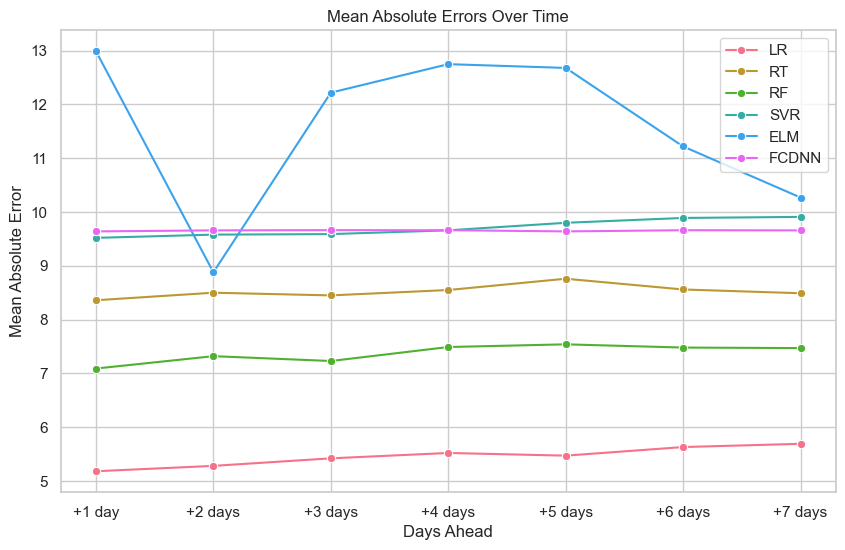

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the MAE values stored in these variables
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']
mae_lr = [5.18, 5.28, 5.42, 5.52, 5.47, 5.63, 5.69]
mae_fcdnn = [9.64, 9.659, 9.663, 9.662, 9.64, 9.662, 9.659]
mae_svr = [9.52, 9.58, 9.59, 9.66, 9.80, 9.89, 9.91]
mae_rf = [7.09, 7.32, 7.23, 7.49, 7.54, 7.48, 7.47]
mae_rt = [8.36, 8.50, 8.45, 8.55, 8.76, 8.56, 8.49]
mae_elm = [12.99, 8.88, 12.22, 12.75, 12.68, 11.22, 10.27]


# Create a DataFrame
data = {
    'Days': days,
    'LR': mae_lr,
    'RT': mae_rt,
    'RF': mae_rf,
    'SVR': mae_svr,
    'ELM': mae_elm,
    'FCDNN': mae_fcdnn,
}
df = pd.DataFrame(data)

# Create a line plot with error bars
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
palette = sns.color_palette("husl", len(df.columns) - 1)  # Adjust the color palette as needed

for i, model in enumerate(df.columns[1:]):
    sns.lineplot(x='Days', y=model, data=df, label=model, marker='o', color=palette[i])

plt.title('Mean Absolute Errors Over Time')
plt.xlabel('Days Ahead')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

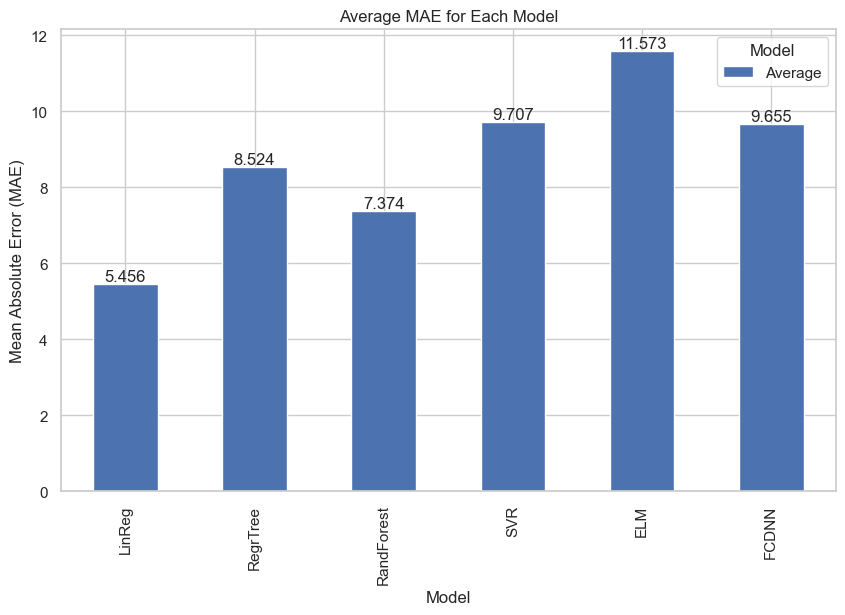

In [49]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

# Assuming you have the MAE values stored in these variables
days = ['+1 day', '+2 days', '+3 days', '+4 days', '+5 days', '+6 days', '+7 days']
mae_lr = [5.18, 5.28, 5.42, 5.52, 5.47, 5.63, 5.69]
mae_fcdnn = [9.64, 9.659, 9.663, 9.662, 9.64, 9.662, 9.659]
mae_svr = [9.52, 9.58, 9.59, 9.66, 9.80, 9.89, 9.91]
mae_rf = [7.09, 7.32, 7.23, 7.49, 7.54, 7.48, 7.47]
mae_rt = [8.36, 8.50, 8.45, 8.55, 8.76, 8.56, 8.49]
mae_elm = [12.99, 8.88, 12.22, 12.75, 12.68, 11.22, 10.27]

# Create a DataFrame
data = {
    'Days': days,
    'LinReg': mae_lr,
    'RegrTree': mae_rt,
    'RandFore': mae_rf,
    'SVR': mae_svr,
    'ELM': mae_elm,
    'FCDNN': mae_fcdnn,
}

df = pd.DataFrame(data)

# Calculate averages for each model
averages = {
    'Model': 'Average',
    'LinReg': round(sum(mae_lr) / len(mae_lr), 3),
    'RegrTree': round(sum(mae_rt) / len(mae_rt), 3),
    'RandForest': round(sum(mae_rf) / len(mae_rf), 3),
    'SVR': round(sum(mae_svr) / len(mae_svr), 3),
    'ELM': round(sum(mae_elm) / len(mae_elm), 3),
    'FCDNN': round(sum(mae_fcdnn) / len(mae_fcdnn), 3),
}

# Append a separator row with empty strings
df = df.append({'Days': '', 'LR': '', 'RT': '', 'RF': '', 'SVR': '', 'ELM': '', 'FCDNN': ''}, ignore_index=True)

# Append the averages as a new row
df = df.append(averages, ignore_index=True)

# Plot the average values as a bar graph with annotations and legend
averages_df = pd.DataFrame([averages])
averages_df.set_index('Model', inplace=True)

ax = averages_df.T.plot(kind='bar', legend=True, figsize=(10, 6))
ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_xlabel('Model')
ax.set_title('Average MAE for Each Model')

# Add annotations for each bar
for idx, value in enumerate(averages_df.values.flatten()):
    ax.text(idx, value, str(value), ha='center', va='bottom')

# Display the bar graph
plt.show()